In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
torch.cuda.is_available(),torch.backends.cudnn.enabled

(True, True)

# Explore data

1. Data downloaded from Kaggle: https://www.kaggle.com/c/dog-breed-identification

In [5]:
PATH = 'data/dogbreed/'
!ls {PATH}

labels.csv	models			   test      tmp    train.zip
labels.csv.zip	sample_submission.csv.zip  test.zip  train


In [7]:
csv_path = f'{PATH}labels.csv'

In [8]:
df = pd.read_csv(csv_path)
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
df.shape

(10222, 2)

In [10]:
breeds = df.groupby('breed').groups.keys()
breeds

dict_keys(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terri

In [11]:
len(breeds)

120

## Check random images

In [12]:
files = os.listdir(f'{PATH}train')

In [13]:
files[0], len(files)

('3f06362327d11ca13c01a19182911927.jpg', 10222)

In [14]:
import random

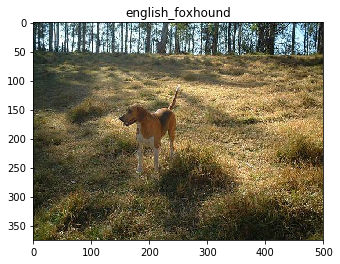

In [17]:
filename = random.choice(files)
img = plt.imread(f'{PATH}train/{filename}')
plt.title(df[df.id==filename[:-4]].breed.item())
plt.imshow(img)

## Create validation set

In [18]:
n = len(list(open(csv_path))) - 1
val_idxs = get_cv_idxs(n)
n, len(val_idxs)

(10222, 2044)

## Time to train

In [19]:
arch = resnet34
sz = 224
bs = 64

In [21]:
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', bs=bs, tfms=tfms_from_model(arch, sz), 
                                    val_idxs=val_idxs, suffix='.jpg')

In [22]:
learn = ConvLearner.pretrained(arch,data,precompute=True)

In [23]:
learn.fit(1e-2,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      2.12559    1.038844   0.774951  
    1      1.082121   0.705333   0.81409                    
    2      0.764164   0.596971   0.829746                    
    3      0.647914   0.55836    0.830724                    
    4      0.571325   0.53575    0.831703                    



[array([0.53575]), 0.8317025446145269]

In [59]:
learn.save('demo')

In [10]:
learn.load('demo')

# Test the model

In [29]:
fn = random.choice(data.trn_ds.fnames)
fn

'train/fb888e2a6e2acca312352030cc8b24de.jpg'

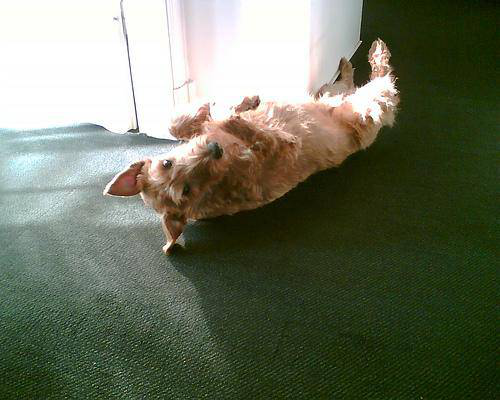

In [30]:
Image.open(PATH+fn)

In [31]:
trn_tfms, val_tfms = tfms_from_model(arch,sz)

In [32]:
im = val_tfms(np.array(open_image(PATH+fn)))
learn.unfreeze()
preds = learn.predict_array(im[None])
data.classes[np.argmax(preds)]

'irish_terrier'

In [33]:
df[df.id==fn[6:-4]].breed.item()

'irish_terrier'

# Useful resources

1. Image kernels in action: http://setosa.io/ev/image-kernels/
1. Resnet Architecture: https://www.kaggle.com/pytorch/resnet34
1. Activation functions: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
1. How CNN mimics human: https://arxiv.org/pdf/1311.2901.pdf